In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
dfstudents = pd.read_csv("/content/drive/MyDrive/tidal datathon/student_data.csv")

In [35]:
dfstudents

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [36]:
dfstudents.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [37]:
allColumns =  [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2', 'G3'
]

columnsToKeep = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
    'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'G1', 'G2', 'G3'
]
columnsToKeepSet = set(columnsToKeep)
targetVariable = 'G3'

In [38]:
def remove_unneeded_columns(df, columnsToKeepSet):
  columns_to_remove = [col for col in df.columns if col not in columnsToKeepSet]
  df.drop(columns_to_remove, axis=1, inplace=True)

  return df

dfstudentsClean = remove_unneeded_columns(dfstudents, columnsToKeepSet)

dfstudentsClean

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [39]:
def create_scatterplots_against_target(df, targetVariable):
  # create scatterplots with single feature on the x axis, target feature on the y axis
  # color the datapoints by their x-value.

  # Number of features excluding the target variable
  n_features = df.shape[1] - 1

  # Setting up the subplot grid
  nrows = n_features // 3 + (n_features % 3 > 0)
  fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

  # Flattening the axis array for easy iteration
  axs = axs.flatten()

  # Counter for the subplot index
  plot_index = 0

  for column in df.columns:
      if column != targetVariable:
          sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
          axs[plot_index].set_title(f'Scatter plot of {column} vs {targetVariable}')
          plot_index += 1

          # Hide any unused subplots
          if plot_index == n_features:
              for i in range(plot_index, len(axs)):
                  axs[i].axis('off')
              break

  # Adjust layout
  plt.tight_layout()
  plt.show()

<ipython-input-39-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-39-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-39-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-39-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=axs[plot_index], palette="viridis")
<ipython-input-39-75d64b835ecc>:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=column, y=targetVariable, ax=a

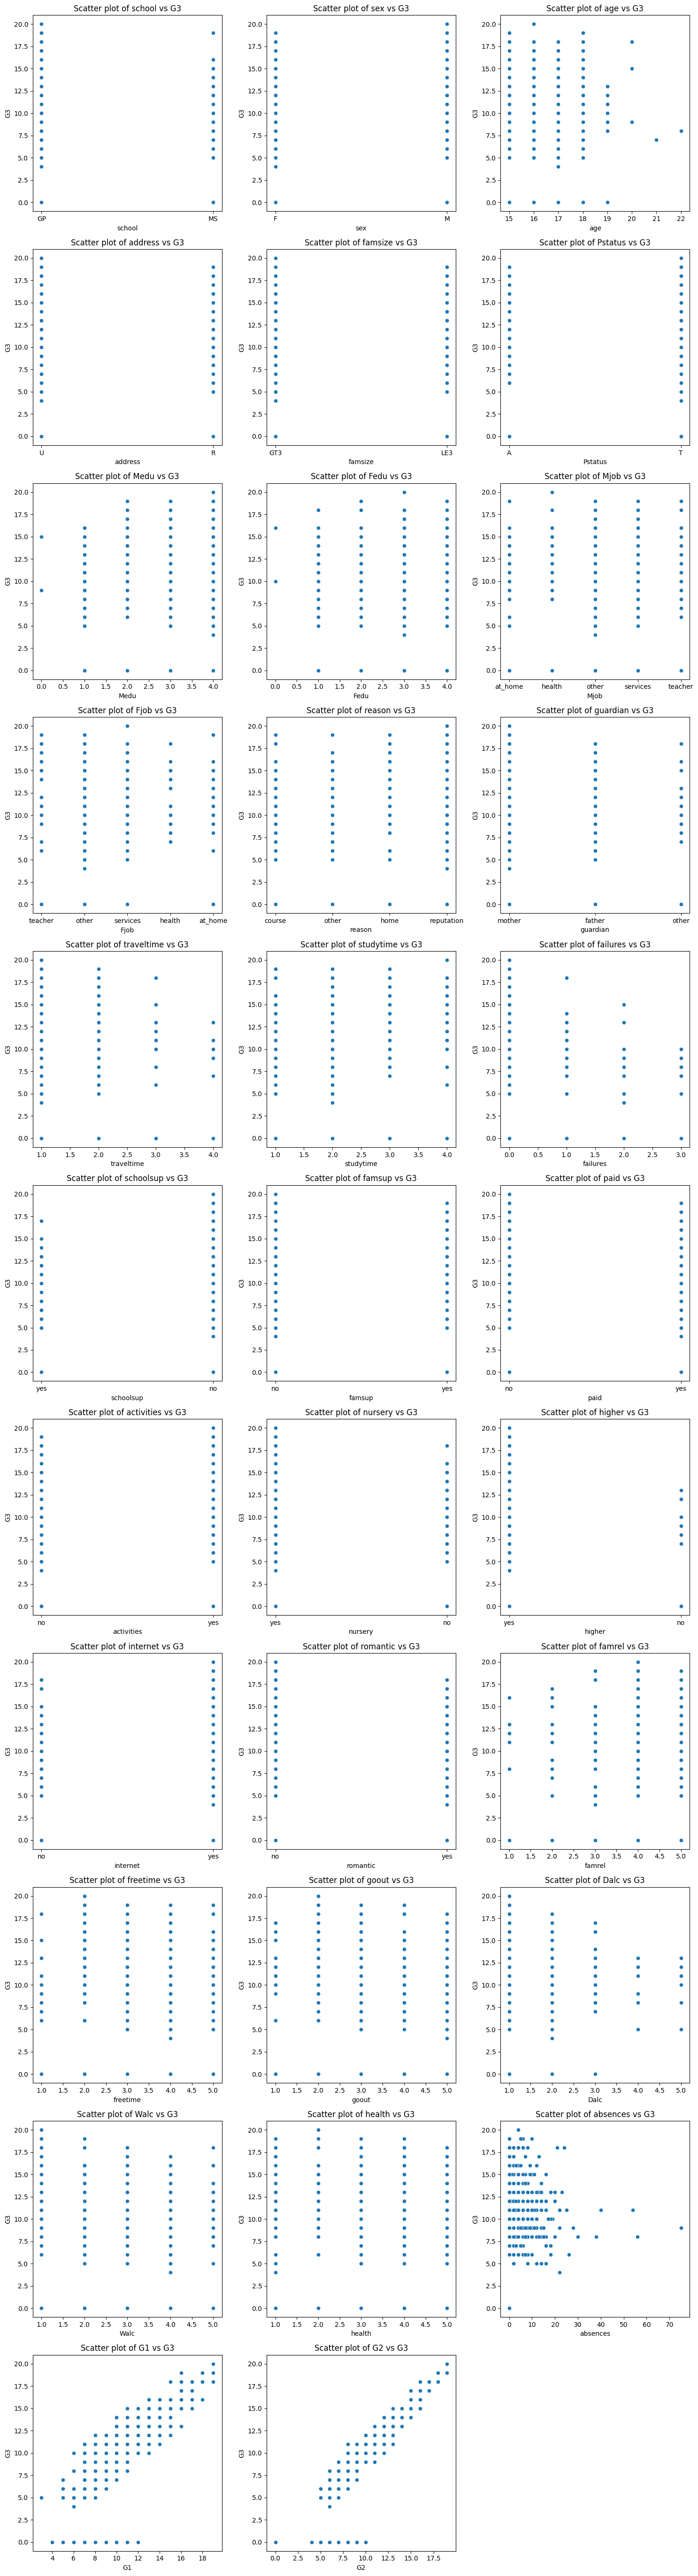

In [40]:
create_scatterplots_against_target(dfstudentsClean, targetVariable)

In [27]:
def create_barcharts_of_cat_feature_counts_to_target_val(df, targetVariable):
  # List of all features excluding the target variable
  features = [col for col in df.columns if col != targetVariable]

  # Creating bar charts for each feature
  for feature in features:
    # Create a crosstab
    crosstab = pd.crosstab(df[targetVariable], df[feature])

    # Plotting
    crosstab.plot(kind='bar', stacked=False, figsize=(10, 6))

    # Plot settings
    plt.title(f'Count of {feature} for each {targetVariable}')
    plt.xlabel(targetVariable)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title=feature)
    plt.show()

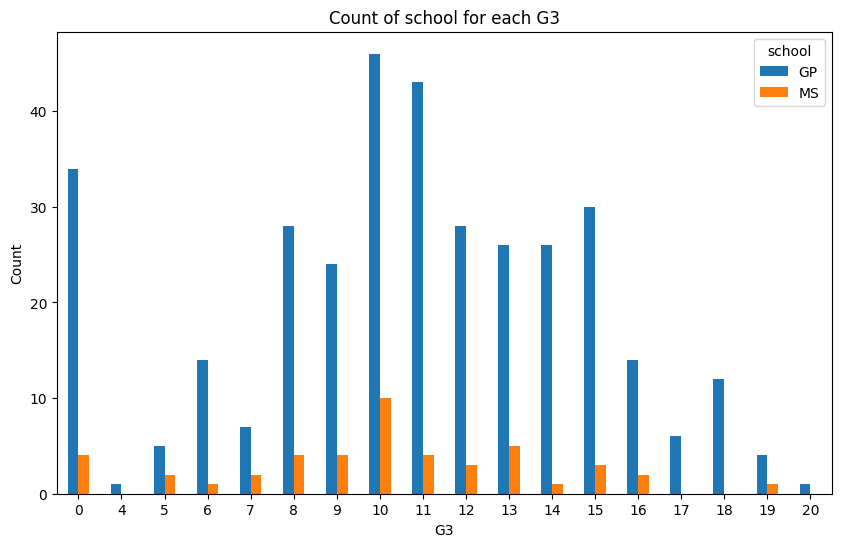

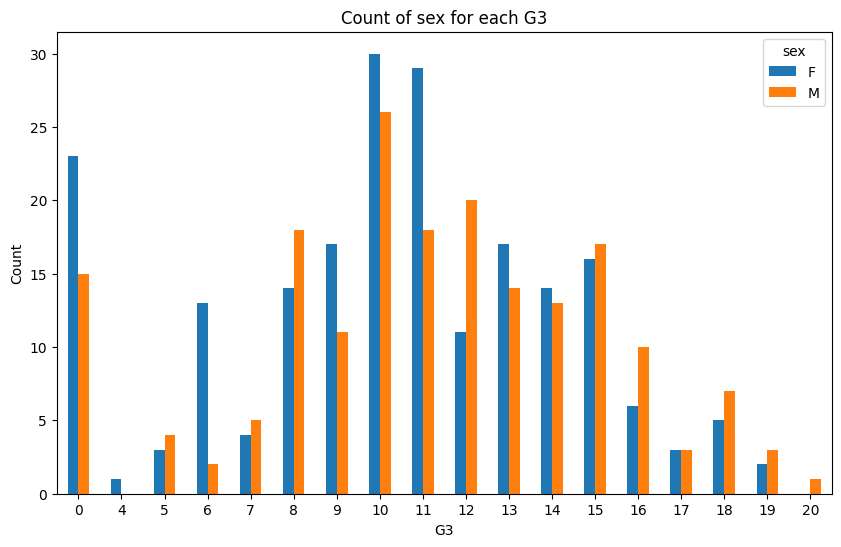

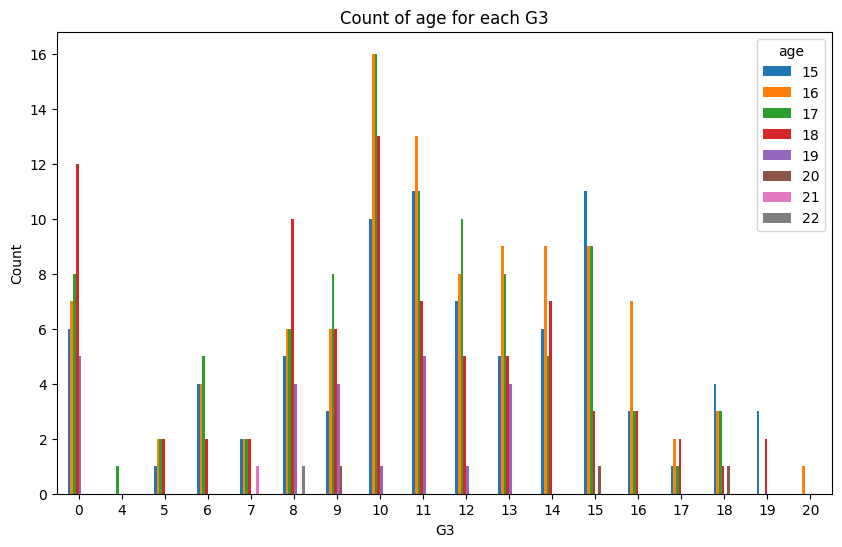

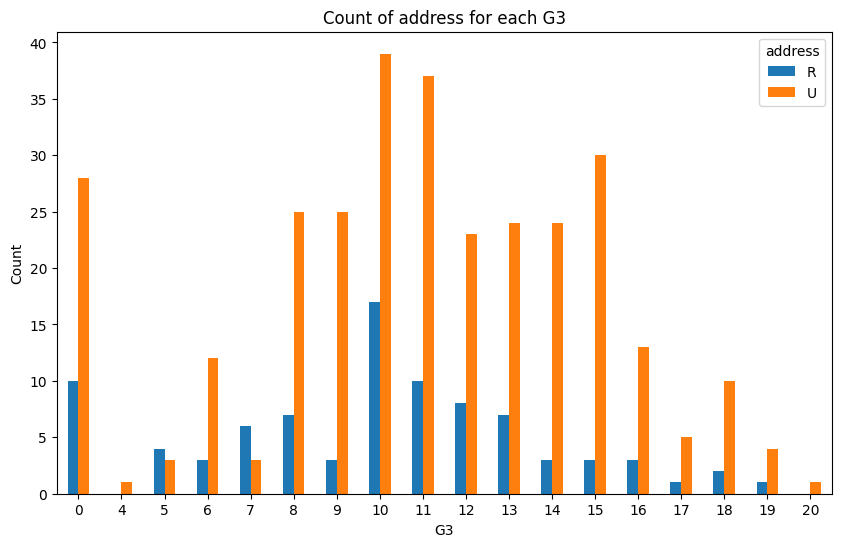

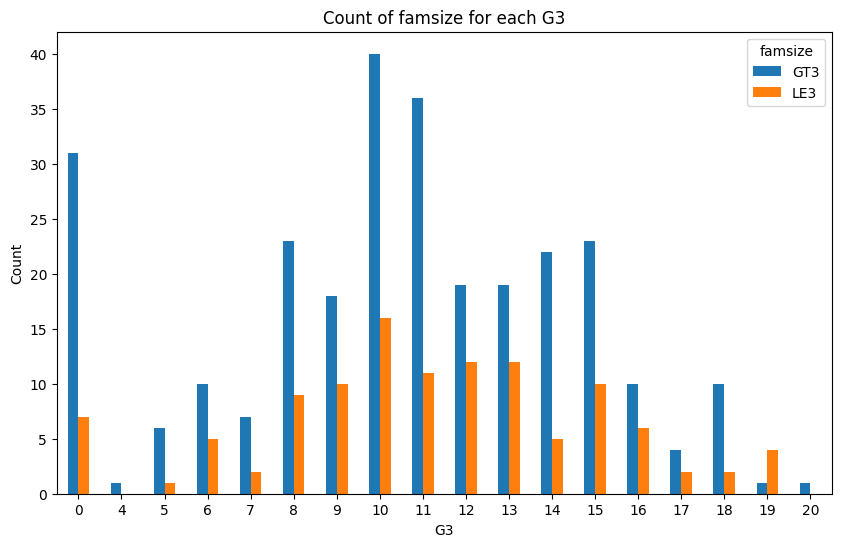

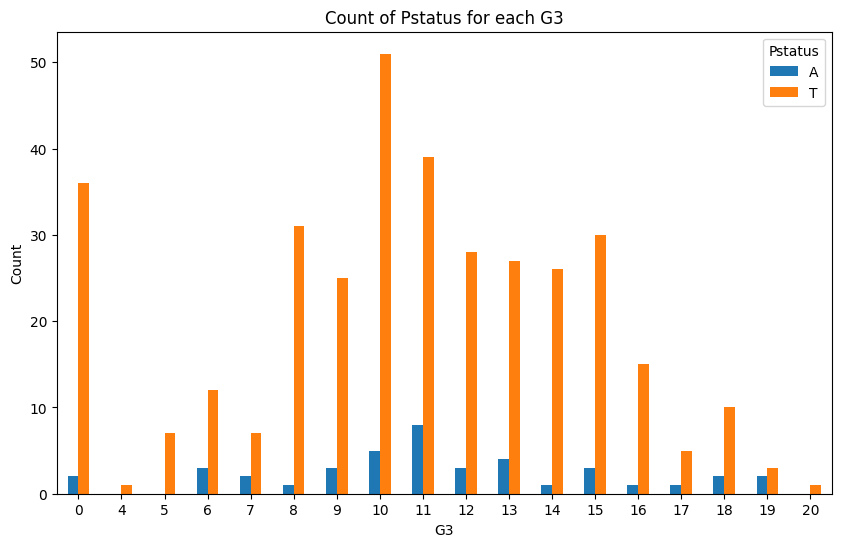

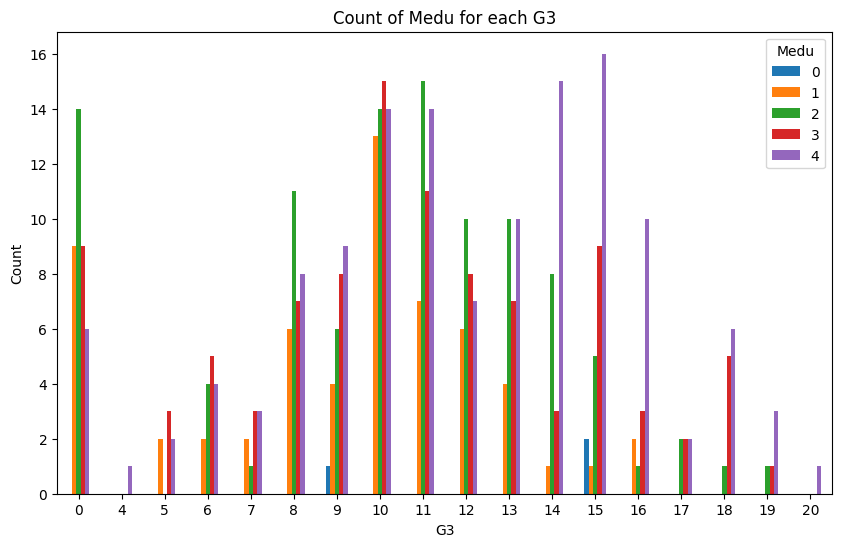

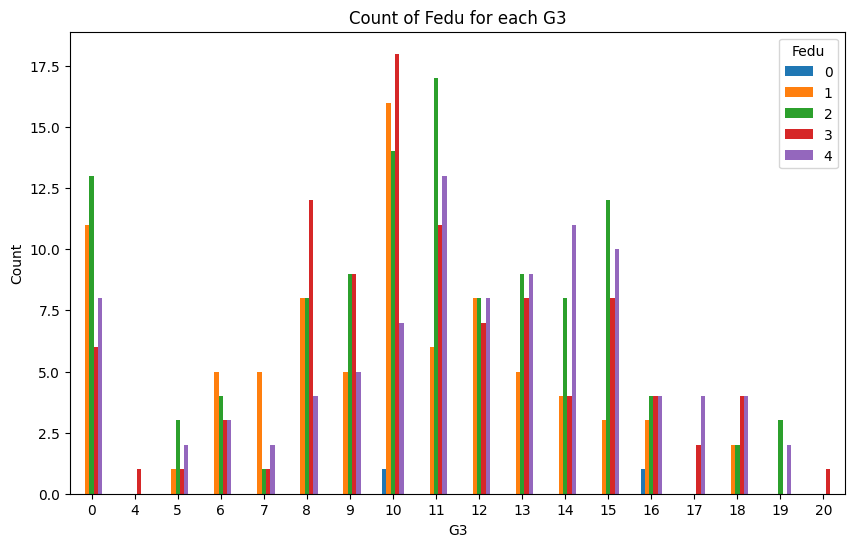

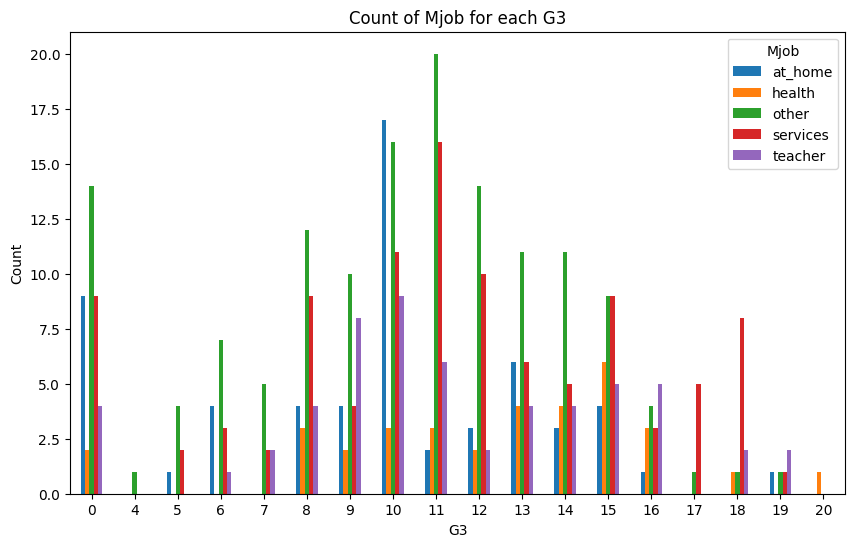

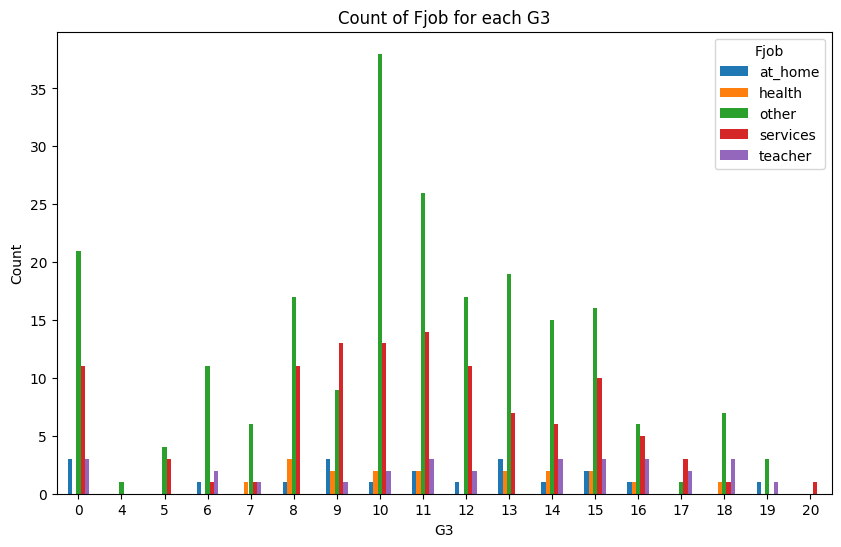

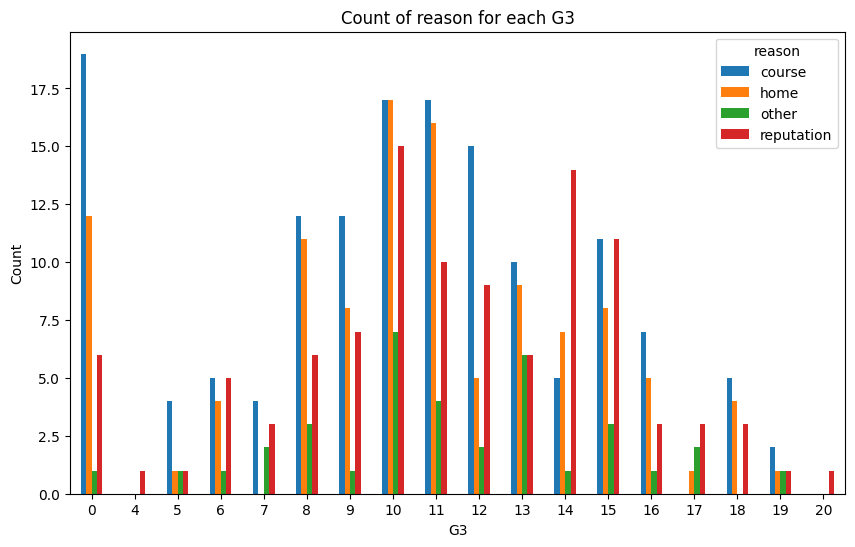

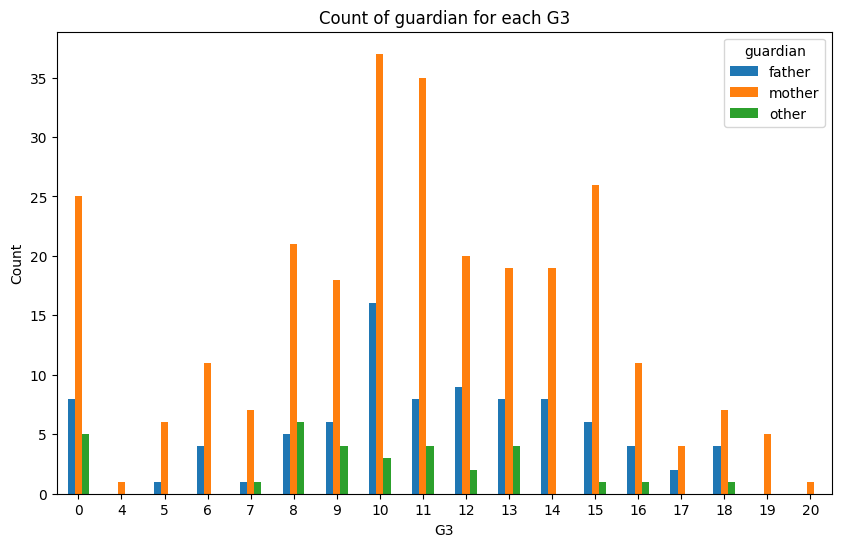

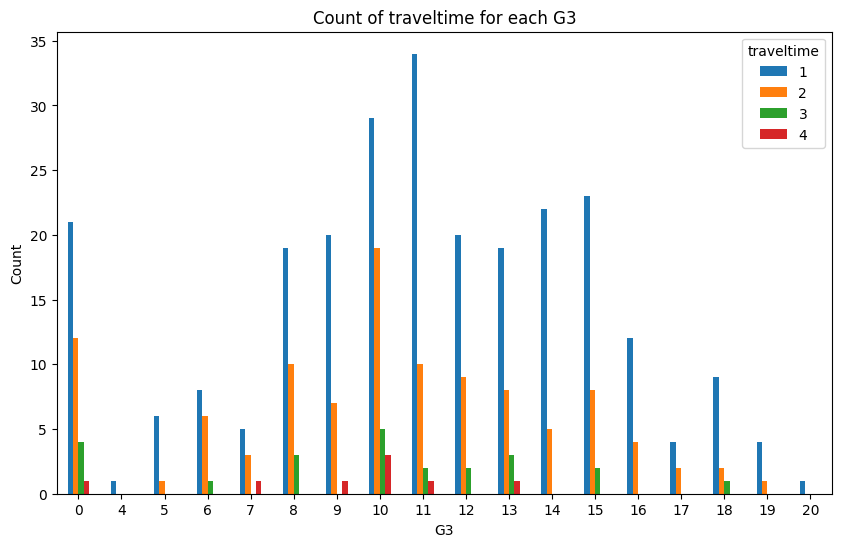

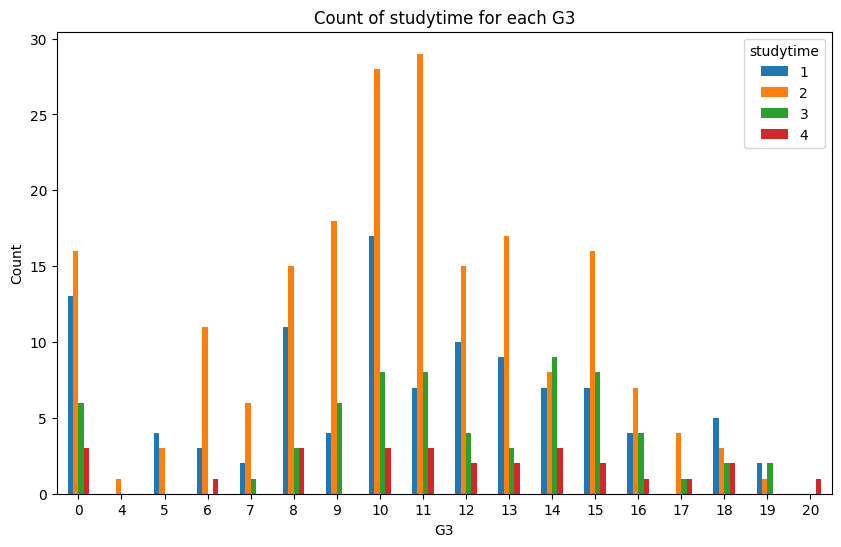

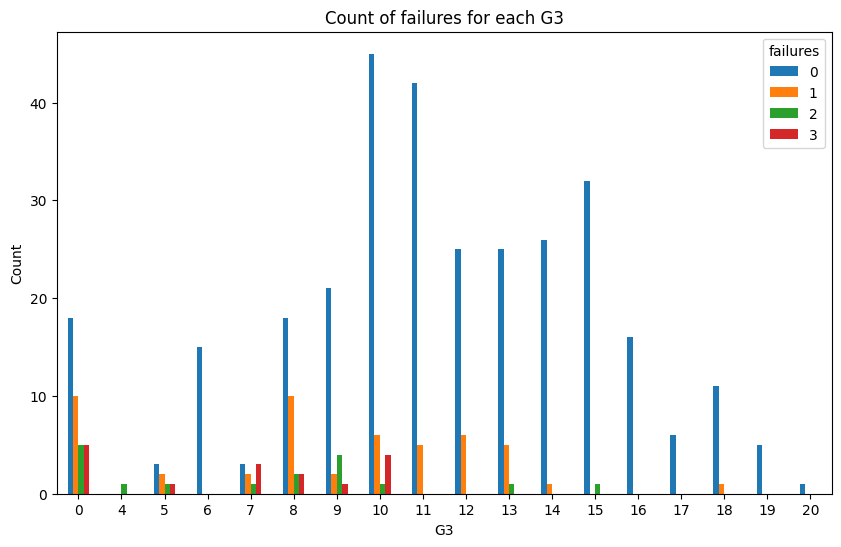

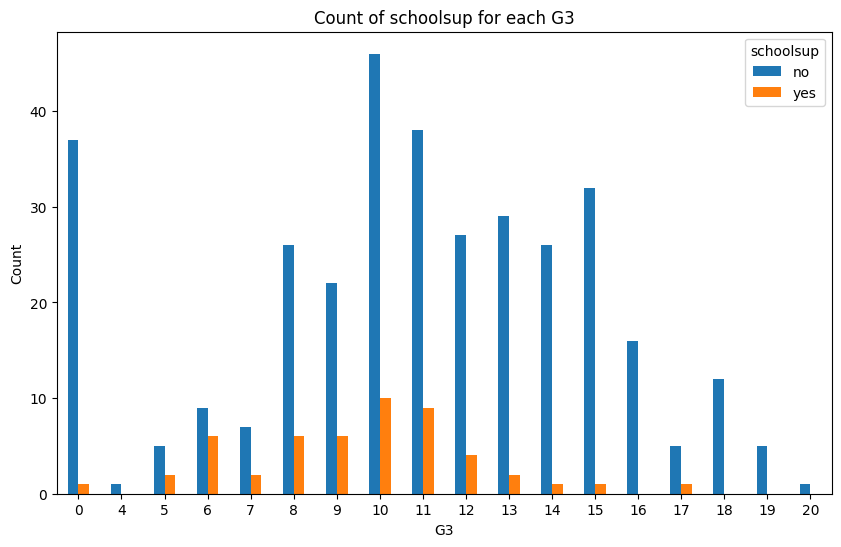

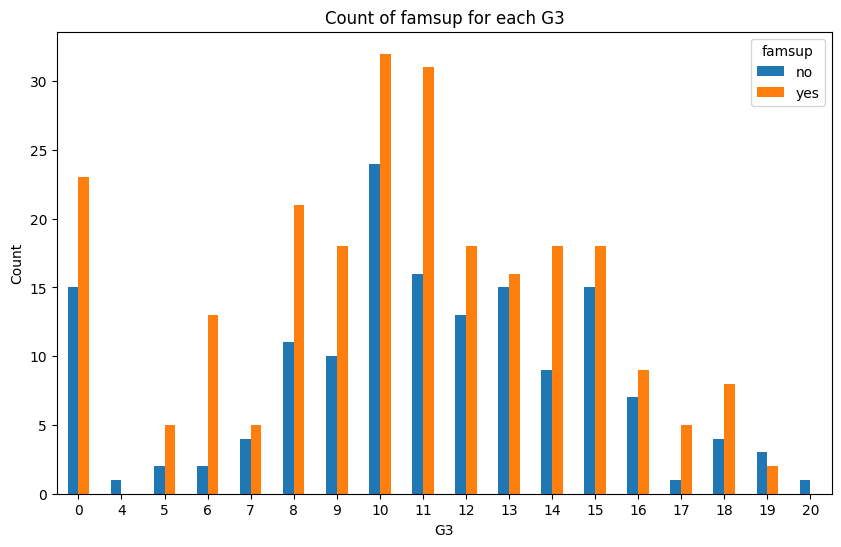

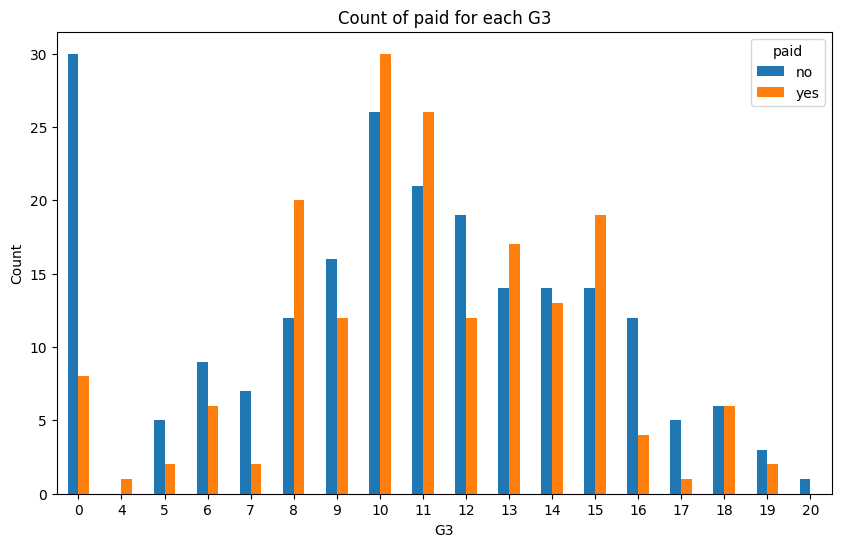

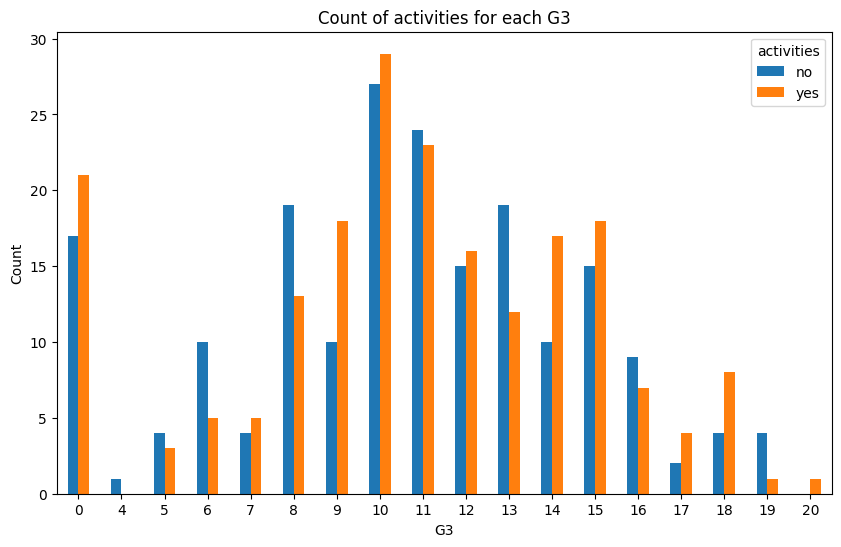

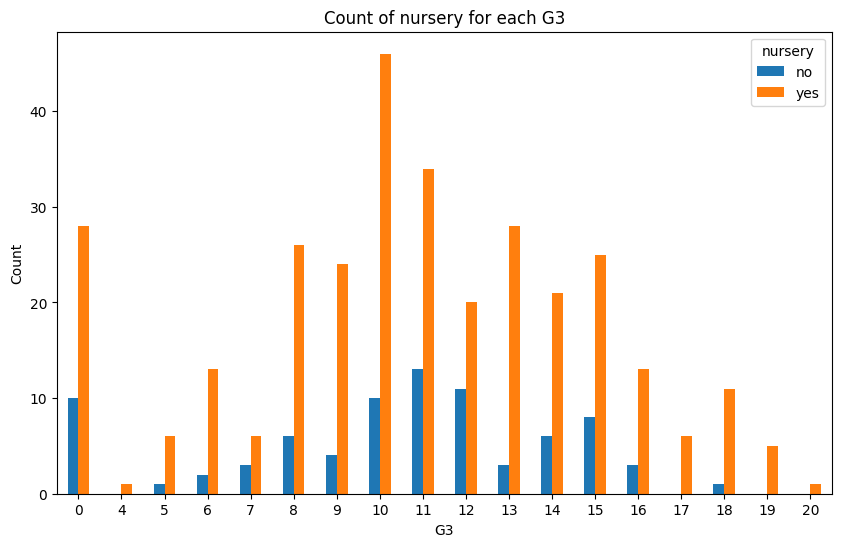

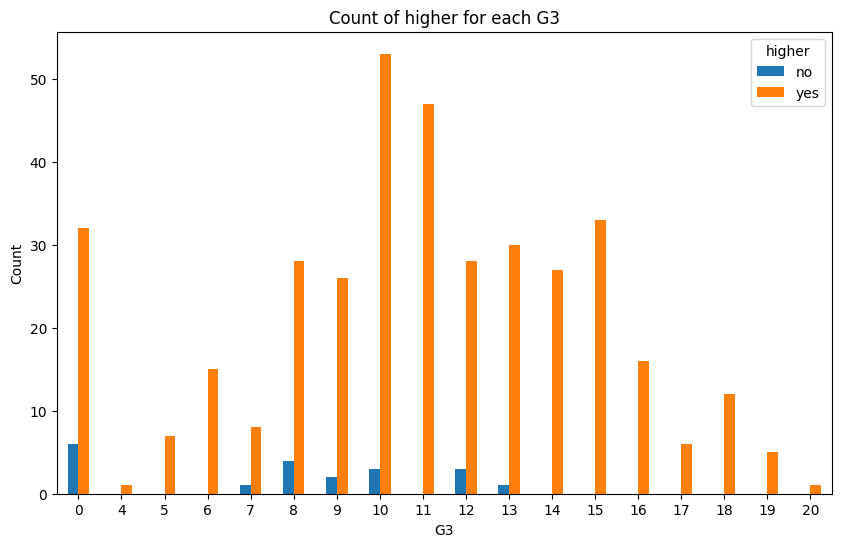

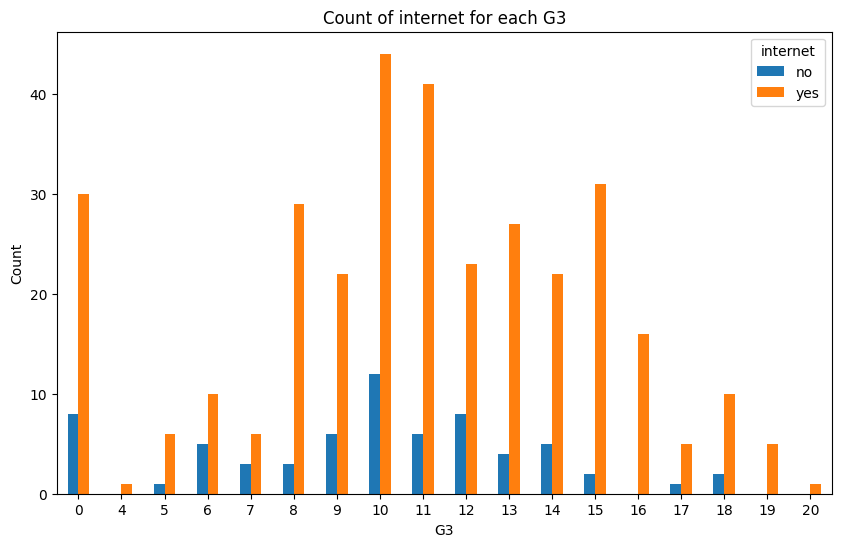

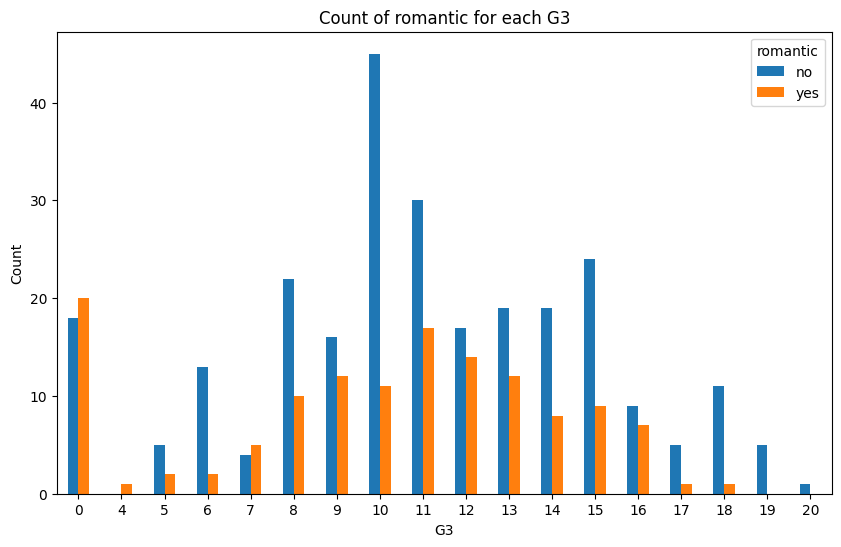

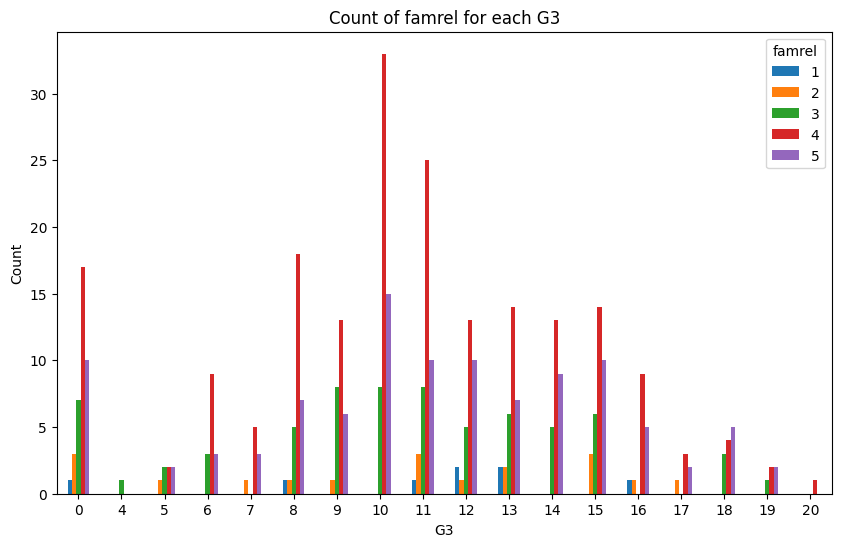

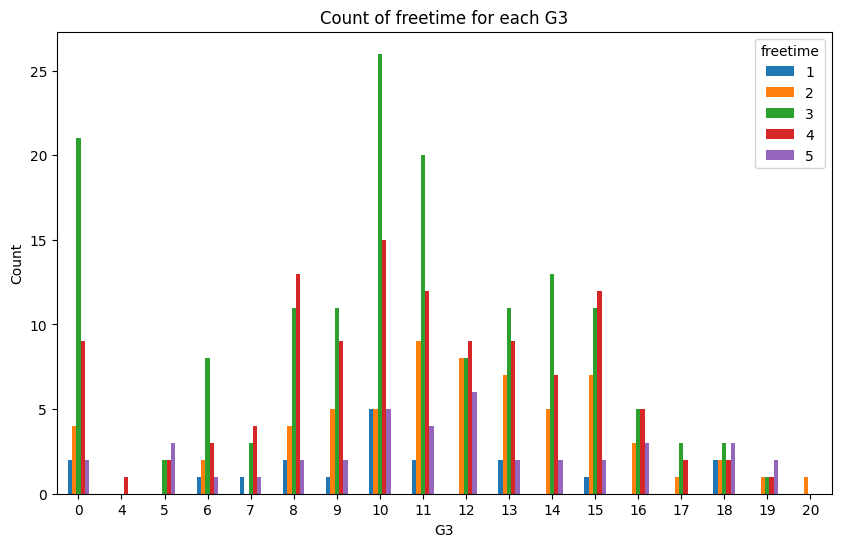

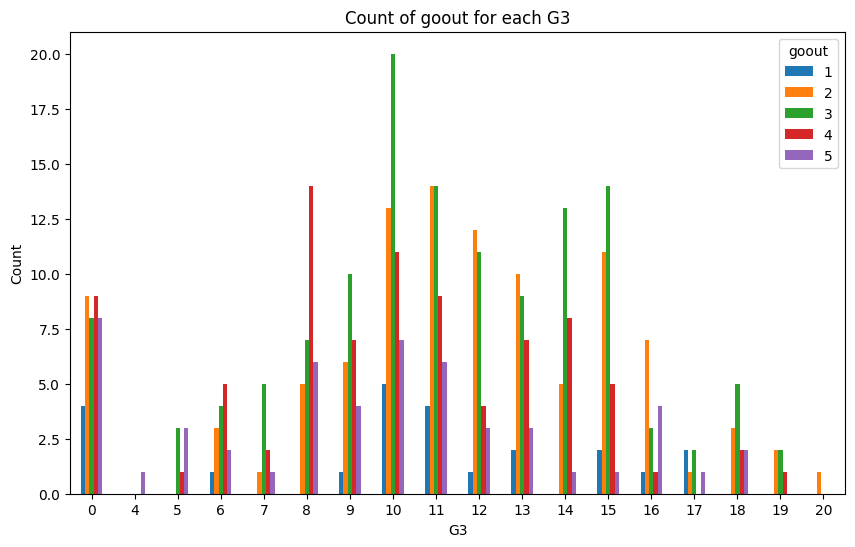

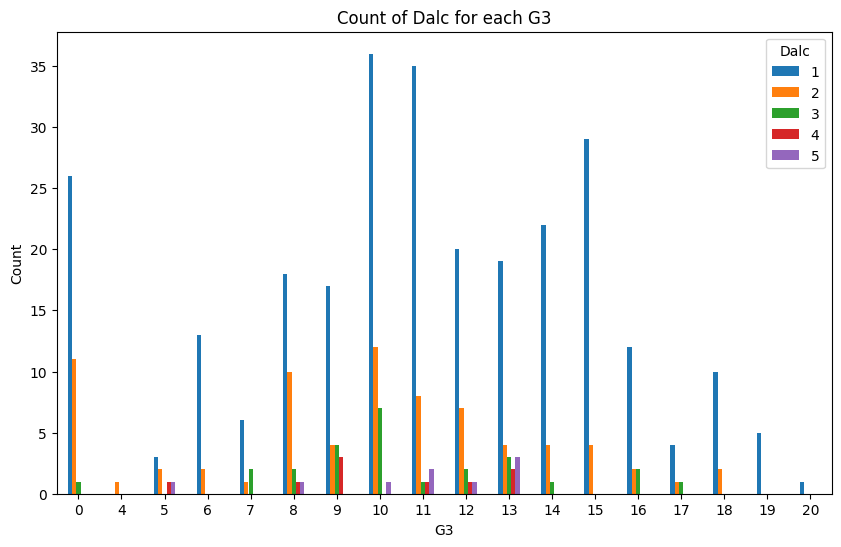

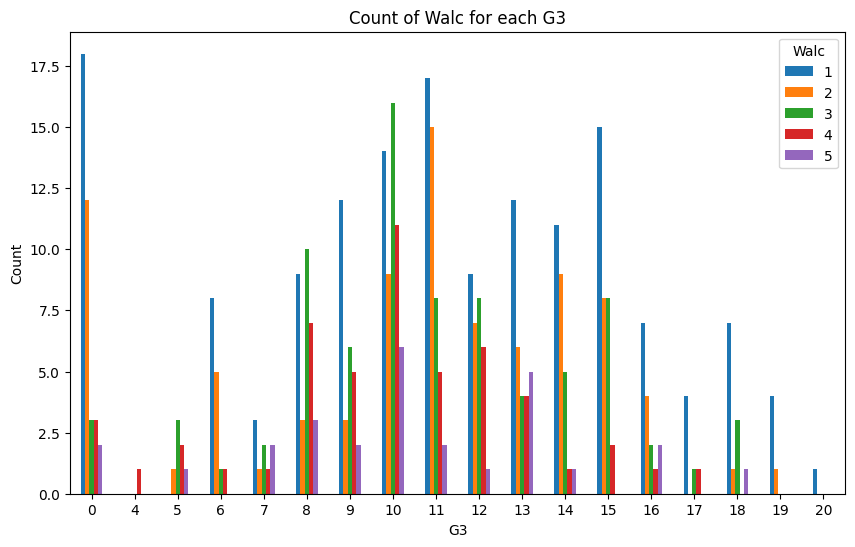

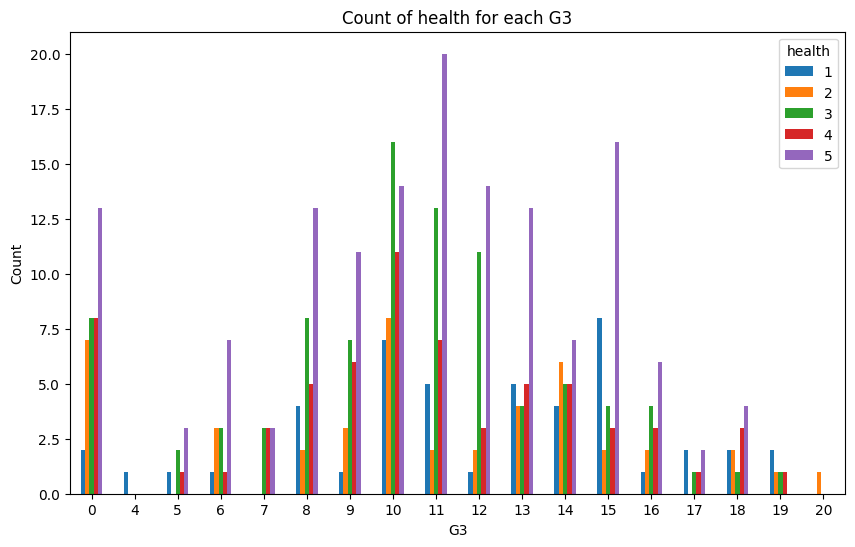

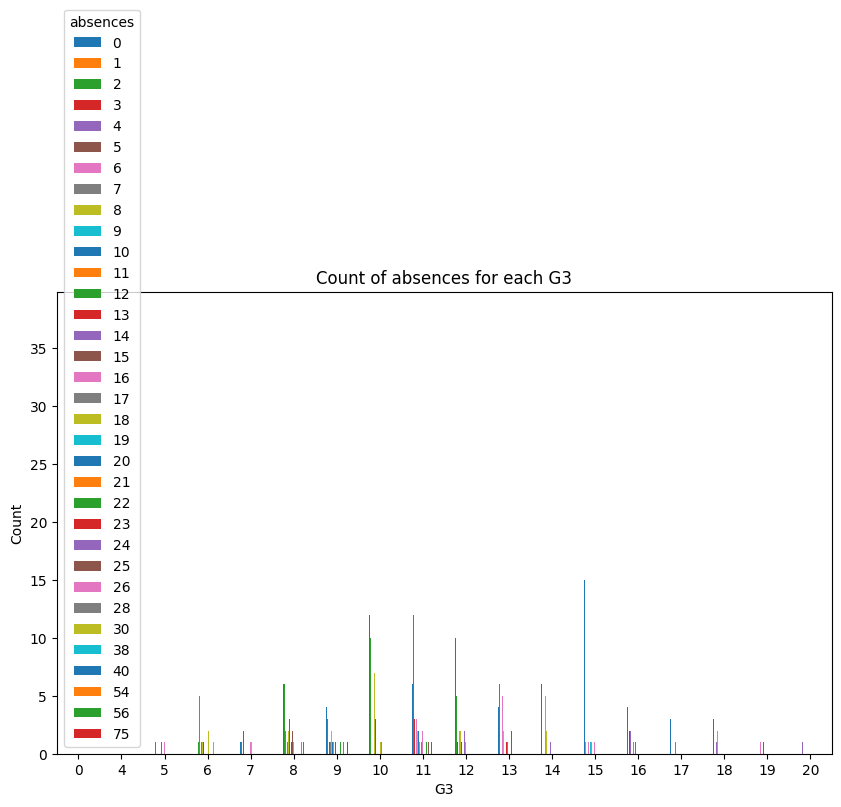

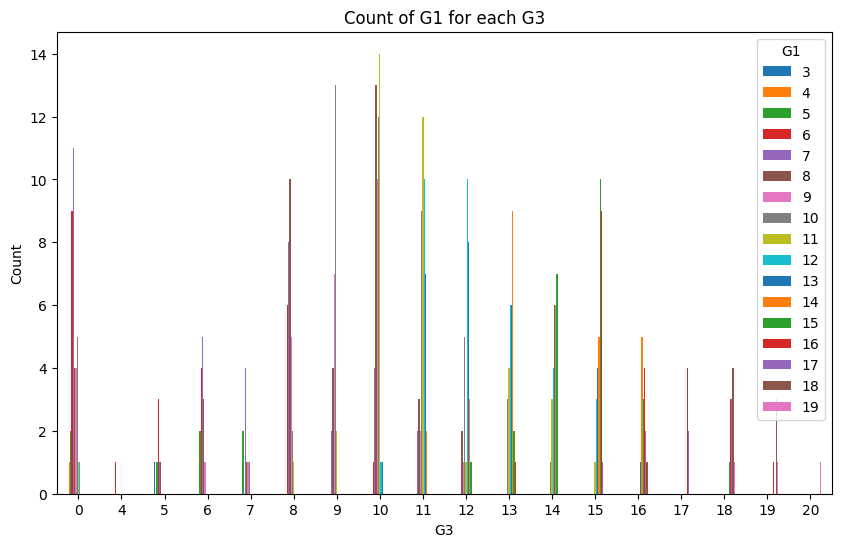

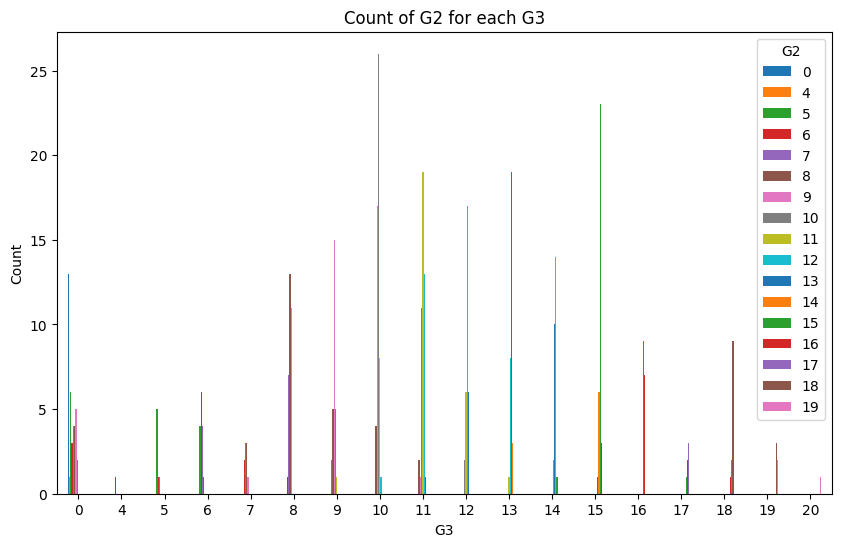

In [28]:
create_barcharts_of_cat_feature_counts_to_target_val(dfstudentsClean, targetVariable)

In [29]:
def create_boxplots_featurex_targety(df, targetVariable):
  # Convert target variable to numeric if it's not already
  df[targetVariable] = pd.to_numeric(df[targetVariable], errors='coerce')

  # List of all features excluding the target variable
  features = [col for col in df.columns if col != targetVariable]

  # Creating box plots for each feature
  for feature in features:
    # Plotting
    sns.boxplot(x=df[feature], y=df[targetVariable])

    # Plot settings
    plt.title(f'Box plot of {targetVariable} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(targetVariable)
    plt.xticks(rotation=45)
    plt.show()

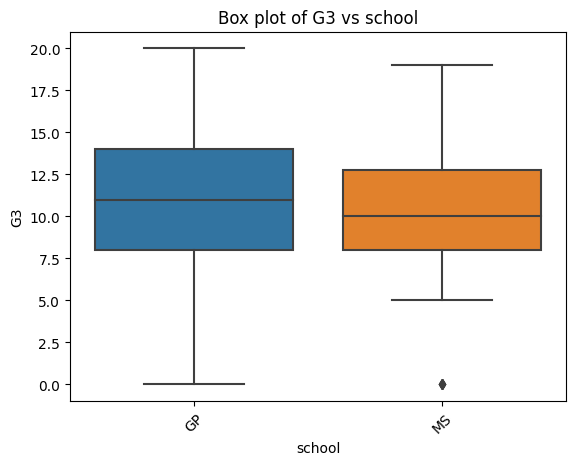

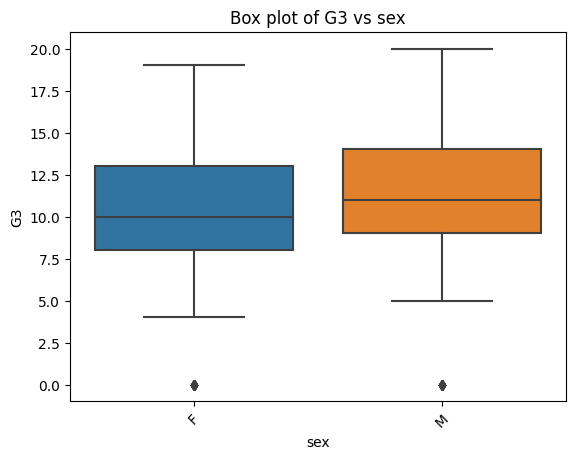

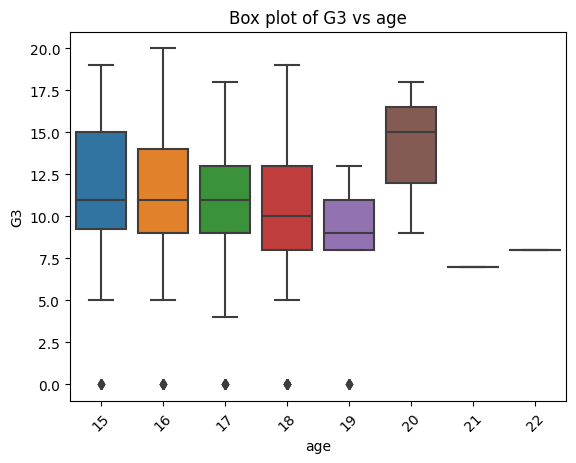

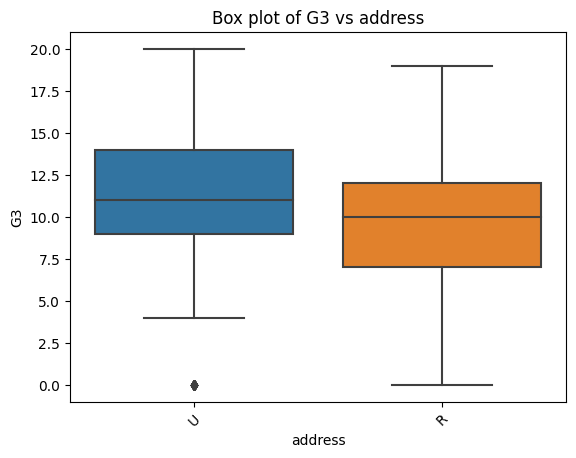

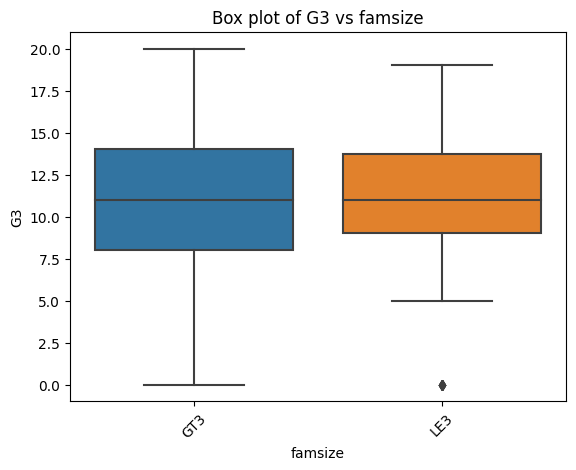

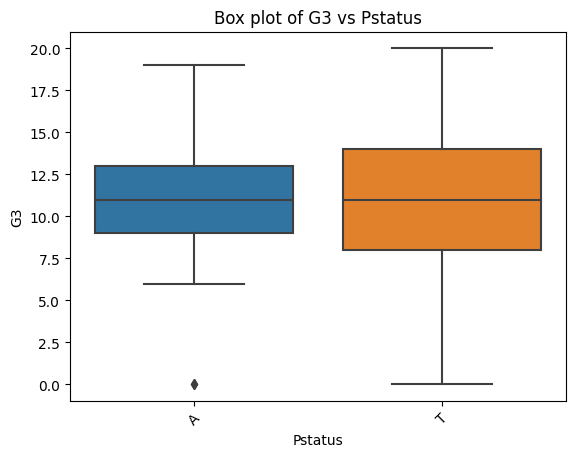

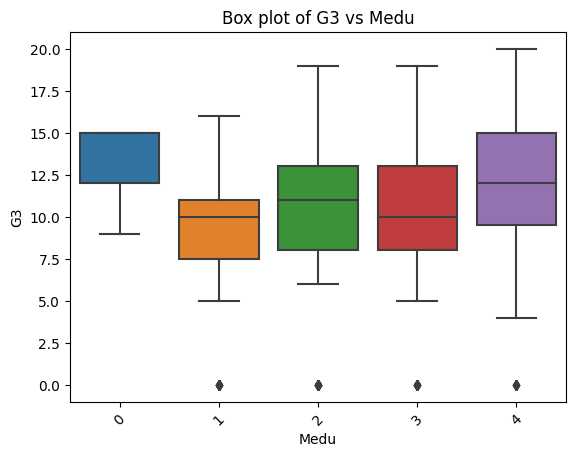

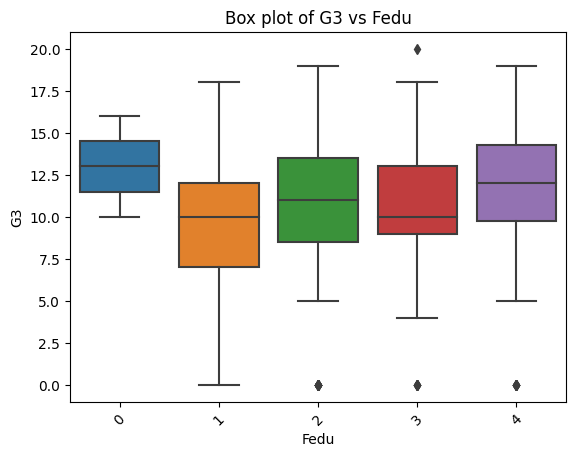

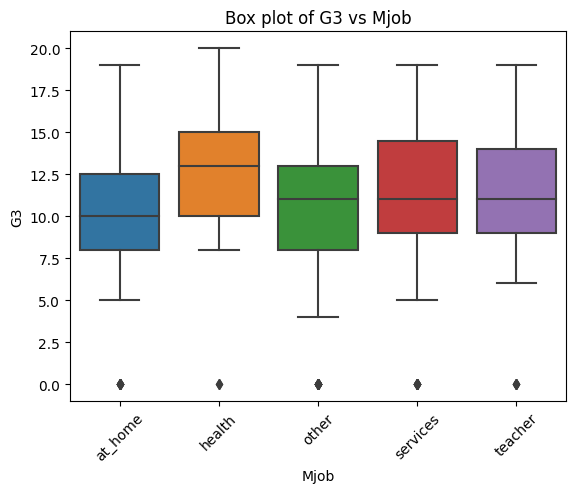

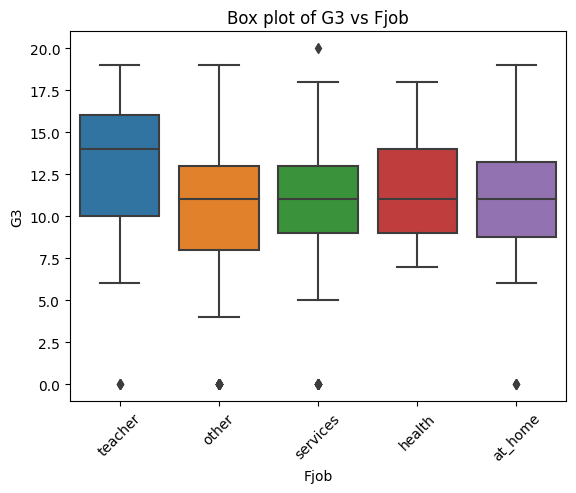

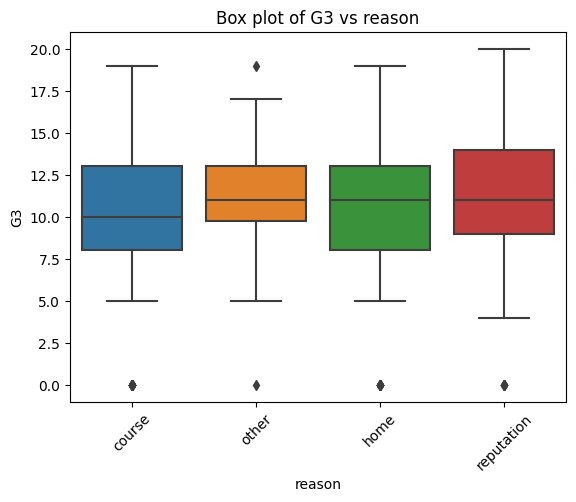

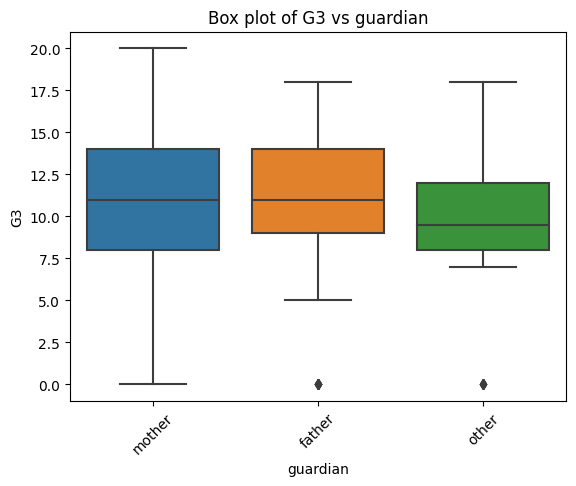

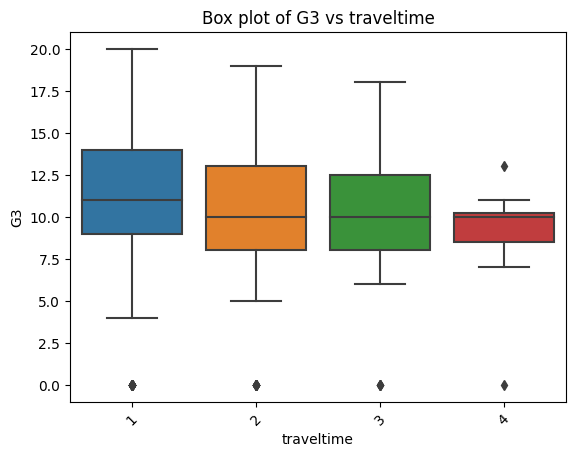

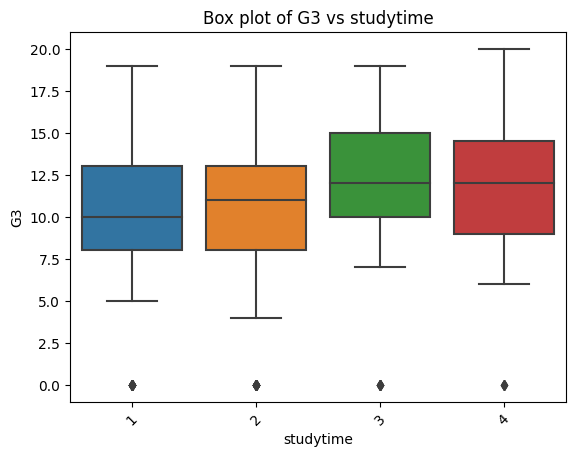

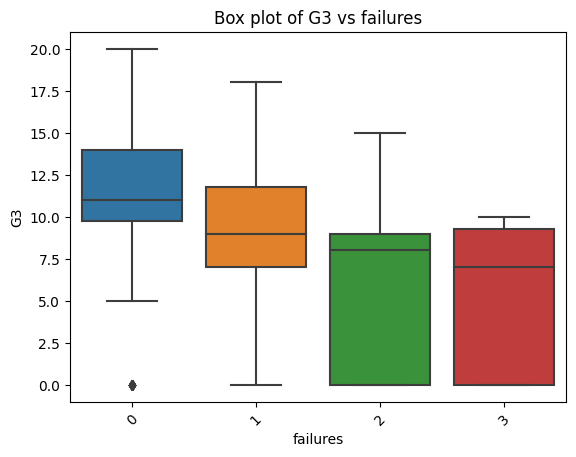

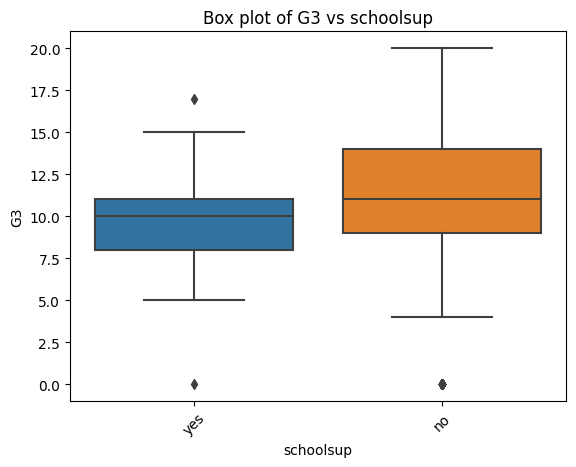

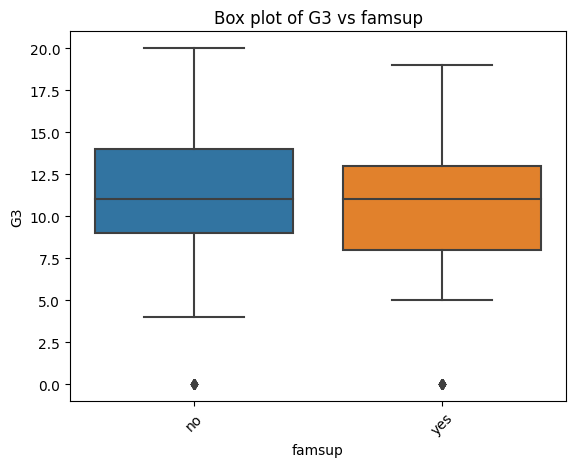

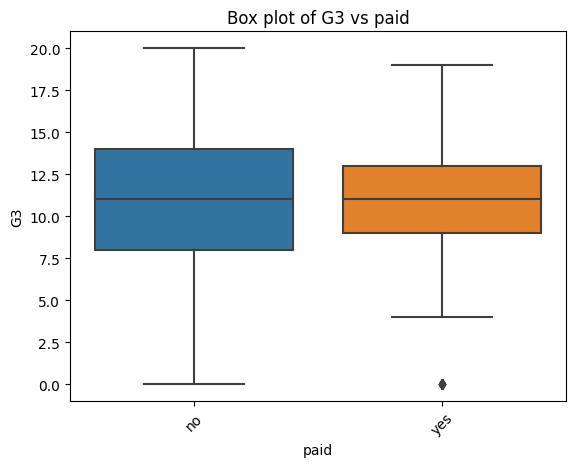

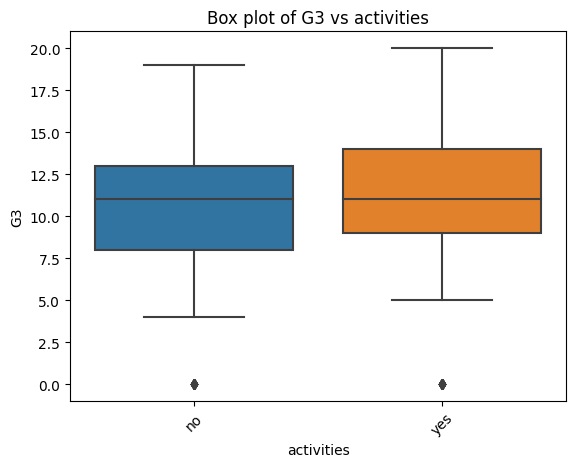

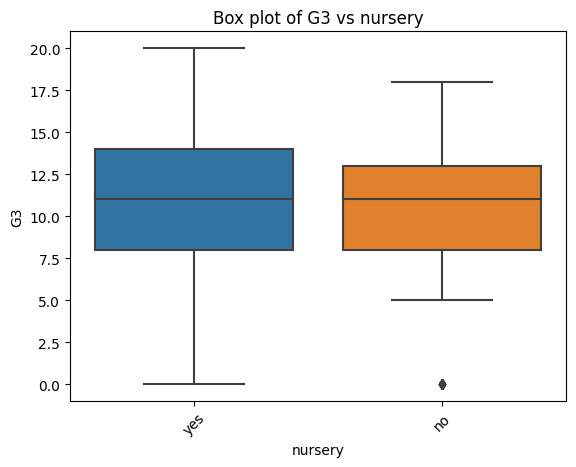

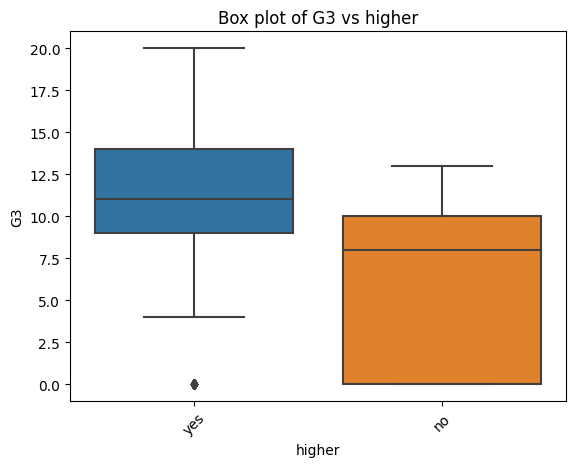

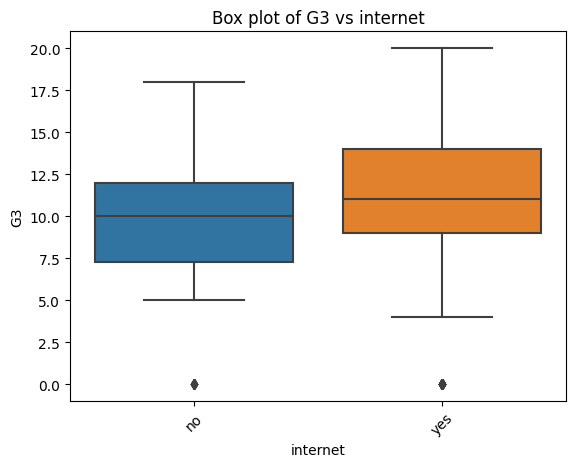

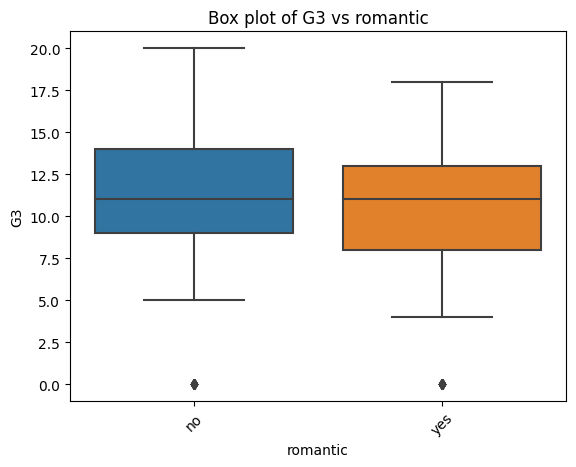

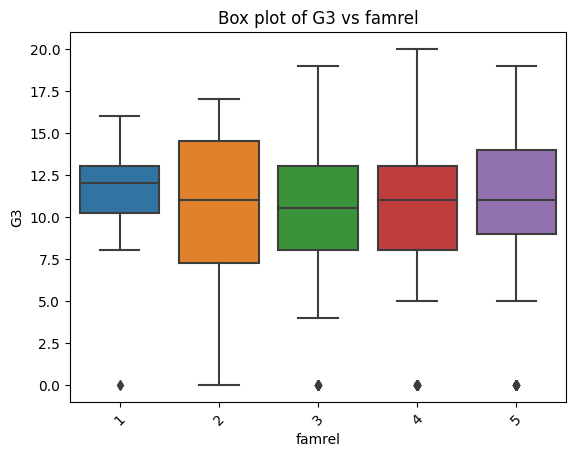

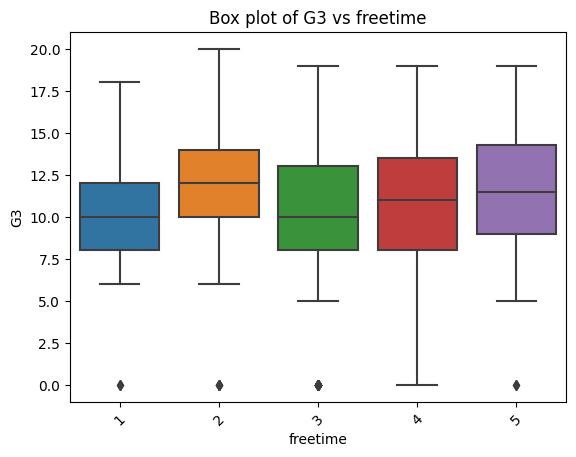

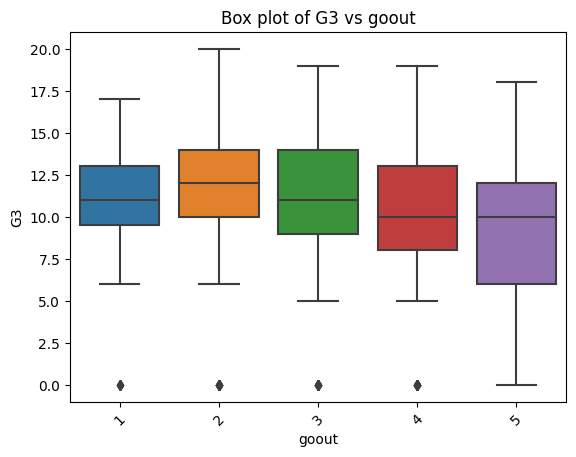

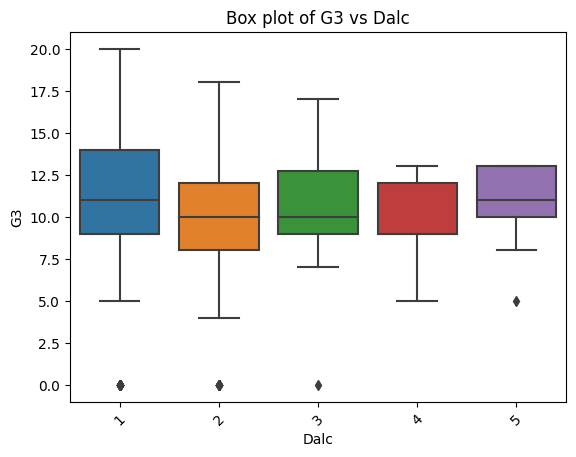

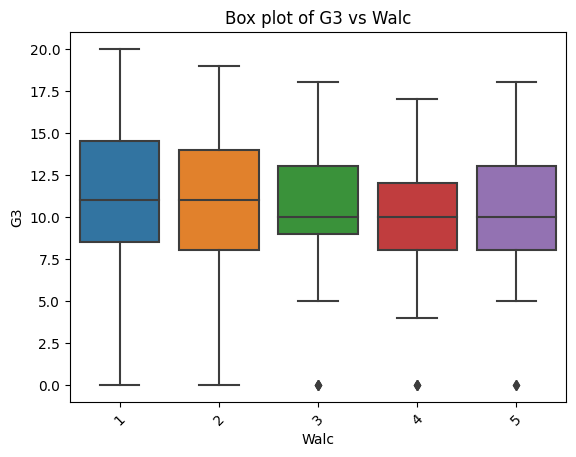

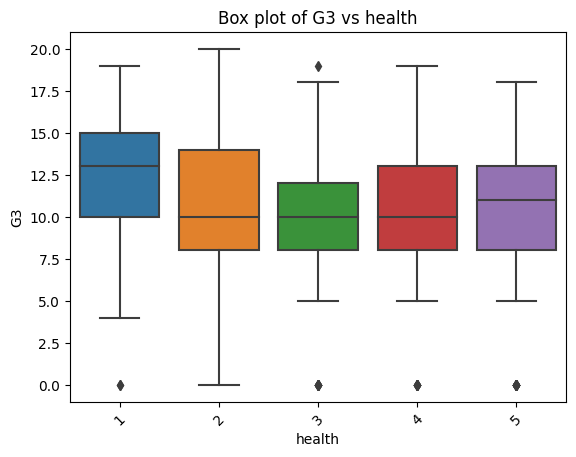

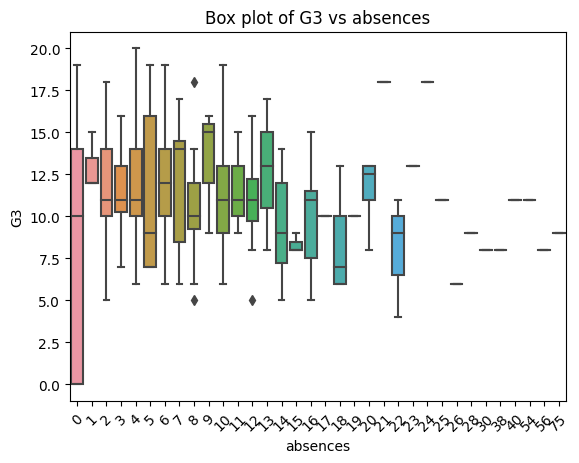

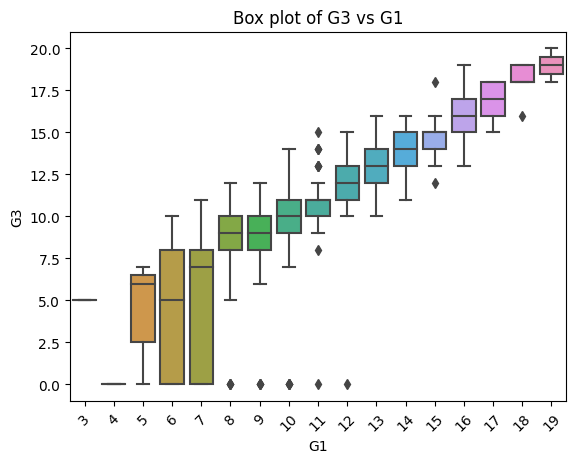

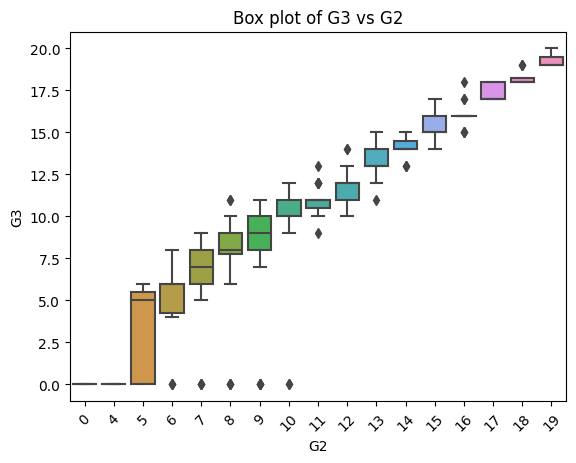

In [30]:
create_boxplots_featurex_targety(dfstudentsClean, targetVariable)